# Extracción de datos de la API

In [2]:
import requests
import pandas as pd

In [3]:
# Ubicación: tres de mayo, morelos
LATITUDE = 18.8597
LONGITUDE = -99.2190
TIMEZONE = "America/Mexico_City"

#Periodo: Febrero de 2020 a 2024
YEARS = [2020,2021, 2022, 2023, 2024]
MONTH = "02" #Febrero

#Lista de parámetros por hora a solicitar (separados por comas)
hourly_params = "temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation"

In [4]:
def obtener_datos_clima_API(year, month):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={LATITUDE}&longitude={LONGITUDE}&start_date={year}-{month}-01&end_date={year}-{month}-27&timezone={TIMEZONE}&hourly={hourly_params}"
    response = requests.get(url)
    data = response.json()
    return data

In [5]:
dataframes = []

for year in YEARS:
    data = obtener_datos_clima_API(year, MONTH)

    print(data)
    print("\n")

    # Convertir la parte "hourly" del JSON en un DataFrame
    df_year = pd.DataFrame(data["hourly"])

    # Convertir la columna 'time' a datetime
    df_year["time"] = pd.to_datetime(df_year["time"])

    # Extraer año, mes y día correctamente desde la columna 'time'
    df_year["year"] = df_year["time"].dt.year
    df_year["month"] = df_year["time"].dt.month  # Corregido para extraer el mes real
    df_year["day"] = df_year["time"].dt.day  # Extraer día correctamente

    # Agregar el DataFrame a la lista
    dataframes.append(df_year)

    print(f"Datos obtenidos para el año {year}.")

{'latitude': 18.87522, 'longitude': -99.212585, 'generationtime_ms': 1.6344785690307617, 'utc_offset_seconds': -21600, 'timezone': 'America/Mexico_City', 'timezone_abbreviation': 'GMT-6', 'elevation': 1281.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'precipitation': 'mm', 'relativehumidity_2m': '%', 'windspeed_10m': 'km/h', 'is_day': '', 'shortwave_radiation': 'W/m²'}, 'hourly': {'time': ['2020-02-01T00:00', '2020-02-01T01:00', '2020-02-01T02:00', '2020-02-01T03:00', '2020-02-01T04:00', '2020-02-01T05:00', '2020-02-01T06:00', '2020-02-01T07:00', '2020-02-01T08:00', '2020-02-01T09:00', '2020-02-01T10:00', '2020-02-01T11:00', '2020-02-01T12:00', '2020-02-01T13:00', '2020-02-01T14:00', '2020-02-01T15:00', '2020-02-01T16:00', '2020-02-01T17:00', '2020-02-01T18:00', '2020-02-01T19:00', '2020-02-01T20:00', '2020-02-01T21:00', '2020-02-01T22:00', '2020-02-01T23:00', '2020-02-02T00:00', '2020-02-02T01:00', '2020-02-02T02:00', '2020-02-02T03:00', '2020-02-02T04:00', '2020-02-

In [6]:
# Unir los datos en un solo DataFrame
df_clima = pd.concat(dataframes, ignore_index=True)

#Visualizar los primero registros (10 registros por defecto)
df_clima.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
0,2020-02-01 00:00:00,15.5,0.0,47,9.5,0,0.0,2020,2,1
1,2020-02-01 01:00:00,15.0,0.0,48,7.9,0,0.0,2020,2,1
2,2020-02-01 02:00:00,15.2,0.0,46,7.2,0,0.0,2020,2,1
3,2020-02-01 03:00:00,15.4,0.0,42,6.7,0,0.0,2020,2,1
4,2020-02-01 04:00:00,15.2,0.0,40,8.1,0,0.0,2020,2,1


In [7]:
# Visualizar los últimos registro (5 registros por defecto)
df_clima.tail()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
3235,2024-02-27 19:00:00,30.3,0.0,12,7.9,0,33.0,2024,2,27
3236,2024-02-27 20:00:00,25.9,0.0,15,7.9,0,0.0,2024,2,27
3237,2024-02-27 21:00:00,22.6,0.0,19,6.4,0,0.0,2024,2,27
3238,2024-02-27 22:00:00,20.8,0.0,21,10.0,0,0.0,2024,2,27
3239,2024-02-27 23:00:00,20.1,0.0,24,9.6,0,0.0,2024,2,27


### 🧹 Limpieza y Organización de los Datos

In [8]:
# Renombrar columnas para mayor claridad
df_clima.rename(columns={
    "temperature_2m": "temperatura",
    "precipitation": "precipitacion",
    "relativehumidity_2m": "humedad_relativa"
}, inplace=True)

📝 **Ejercicio** Renombra las siguientes columnas para mayor claridad:

- `windspeed_10m` → `velocidad_viento`
- `is_day` → `es_dia`
- `shortwave_radiation` → `radiacion_solar`

🔹 Modifica el código para realizar este cambio en el DataFrame `df_clima`.

In [9]:
# Renombrar columnas restantes
df_clima.rename(columns={
    "windspeed_10m": "velocidad_viento",
    "shortwave_radiation": "radiacion_solar",
    "is_day": "es_dia"
}, inplace=True)

In [10]:
df_clima.drop(columns=["time"], inplace=True)

In [11]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       3240 non-null   float64
 1   precipitacion     3240 non-null   float64
 2   humedad_relativa  3240 non-null   int64  
 3   velocidad_viento  3240 non-null   float64
 4   es_dia            3240 non-null   int64  
 5   radiacion_solar   3240 non-null   float64
 6   year              3240 non-null   int32  
 7   month             3240 non-null   int32  
 8   day               3240 non-null   int32  
dtypes: float64(4), int32(3), int64(2)
memory usage: 190.0 KB


In [12]:
#Número de registros duplicados
num_duplicados=df_clima.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 1


# Carga de información desde GitHub

In [13]:
url = "https://raw.githubusercontent.com/CirceDelLop/ClimaAcademiaDataEngineer/refs/heads/main/run-1738693530550-part-r-00000.csv"
df = pd.read_csv(url)
df.head()

,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
0,15.5,0.0,47,9.5,0,0.0,2020,2,1
1,15.0,0.0,48,7.9,0,0.0,2020,2,1
2,15.2,0.0,46,7.2,0,0.0,2020,2,1
3,15.4,0.0,42,6.7,0,0.0,2020,2,1
4,15.2,0.0,40,8.1,0,0.0,2020,2,1


# Análisis exploratorio de los datos

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Información del conjunto de datos
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       3240 non-null   float64
 1   precipitacion     3240 non-null   float64
 2   humedad_relativa  3240 non-null   int64  
 3   velocidad_viento  3240 non-null   float64
 4   es_dia            3240 non-null   int64  
 5   radiacion_solar   3240 non-null   float64
 6   year              3240 non-null   int32  
 7   month             3240 non-null   int32  
 8   day               3240 non-null   int32  
dtypes: float64(4), int32(3), int64(2)
memory usage: 190.0 KB


In [16]:
# Lista de columnas numéricas
numerical_columns = ["temperatura", "precipitacion", "humedad_relativa", "velocidad_viento", "radiacion_solar"]

In [17]:
#Revisar estadísticas básicas del dataframe
df_clima.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,21.750093,0.007284,35.754321,5.915463,0.465432,260.178086,2022.000000,2.0,14.000000
std,5.330434,0.086702,13.482479,3.086122,0.498881,342.297916,1.414432,0.0,7.790083
min,10.100000,0.000000,7.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,17.300000,0.000000,25.000000,3.700000,0.000000,0.000000,2021.000000,2.0,7.000000
50%,21.000000,0.000000,34.000000,5.400000,0.000000,3.500000,2022.000000,2.0,14.000000
75%,26.400000,0.000000,44.000000,7.600000,1.000000,548.000000,2023.000000,2.0,21.000000
max,34.700000,2.500000,93.000000,23.600000,1.000000,988.000000,2024.000000,2.0,27.000000


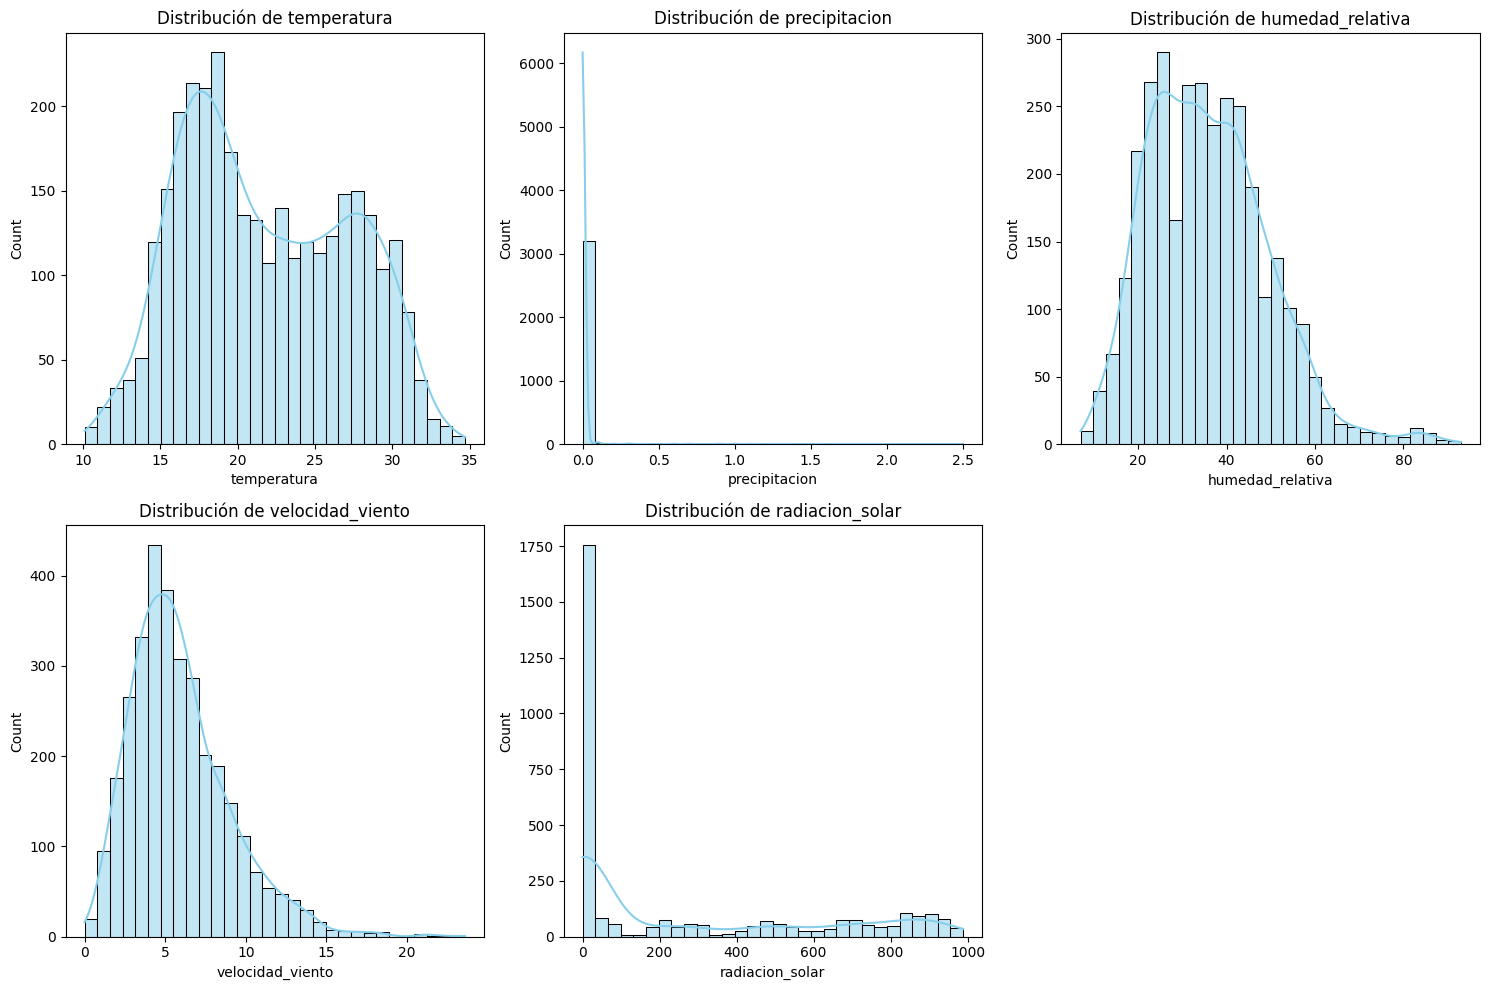

In [18]:
# Configuran el tamaño del gráfico
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_clima[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

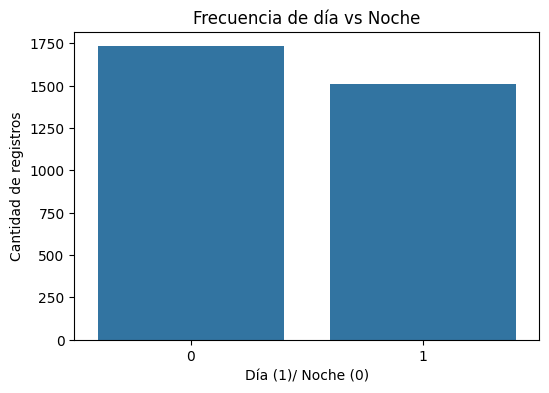

In [19]:
# Gráfico de conteo para is_day
plt.figure(figsize=(6,4))
sns.countplot(x=df_clima["es_dia"])
plt.title("Frecuencia de día vs Noche")
plt.xlabel("Día (1)/ Noche (0)")
plt.ylabel("Cantidad de registros")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

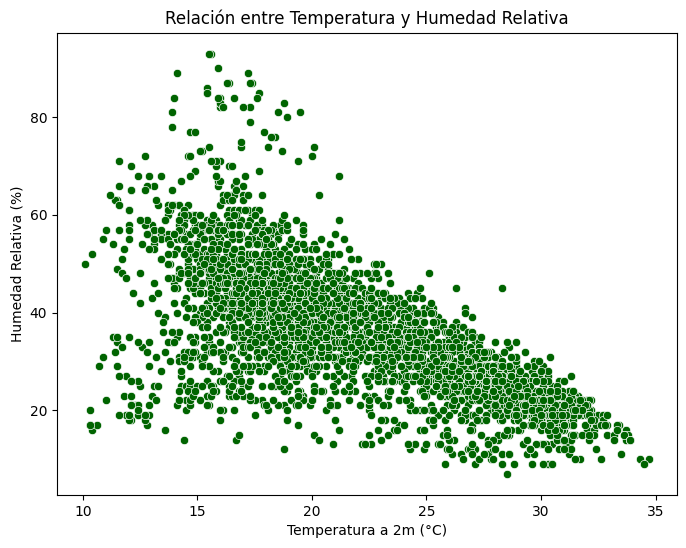

In [20]:
#Ejemplo: Scatter plot de temperatura vs humedad relativa
#El contraste debe de ser entre dos variables numéricas o una numérica y otra categória
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clima, x="temperatura", y="humedad_relativa",color="darkgreen")
plt.title("Relación entre Temperatura y Humedad Relativa")
plt.xlabel("Temperatura a 2m (°C)")
plt.ylabel("Humedad Relativa (%)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

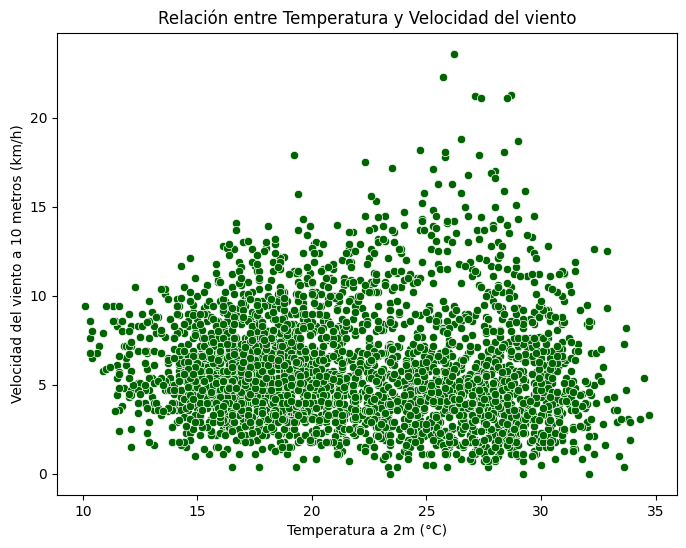

In [21]:
# Ejemplo: Scatter plot de temperatura vs velocidad_viento
# El contraste debe de ser entre dos variables numéricas o una numérica y otra categória
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clima, x="temperatura", y="velocidad_viento",color="darkgreen")
plt.title("Relación entre Temperatura y Velocidad del viento")
plt.xlabel("Temperatura a 2m (°C)")
plt.ylabel("Velocidad del viento a 10 metros (km/h)")
plt.show

Text(0.5, 0, 'Precipitacion')

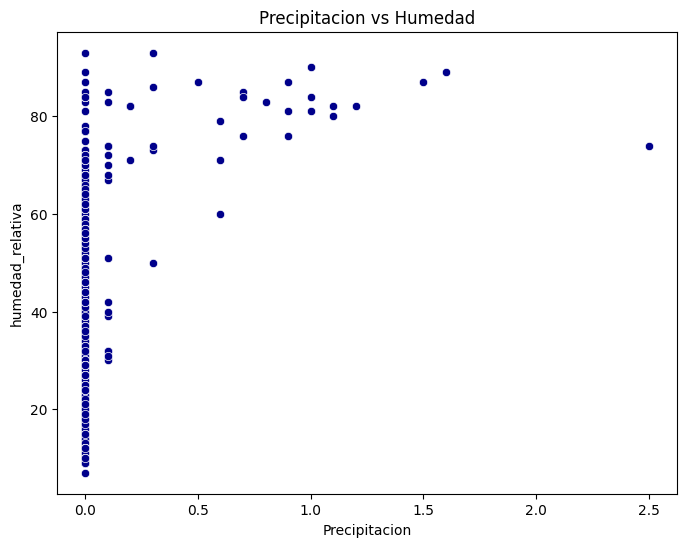

In [22]:
# Ejercicio: Scatter plot para Precipitacion vs humedad
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clima, x='precipitacion', y='humedad_relativa', color = "darkblue")
plt.title('Precipitacion vs Humedad')
plt.xlabel('Precipitacion')

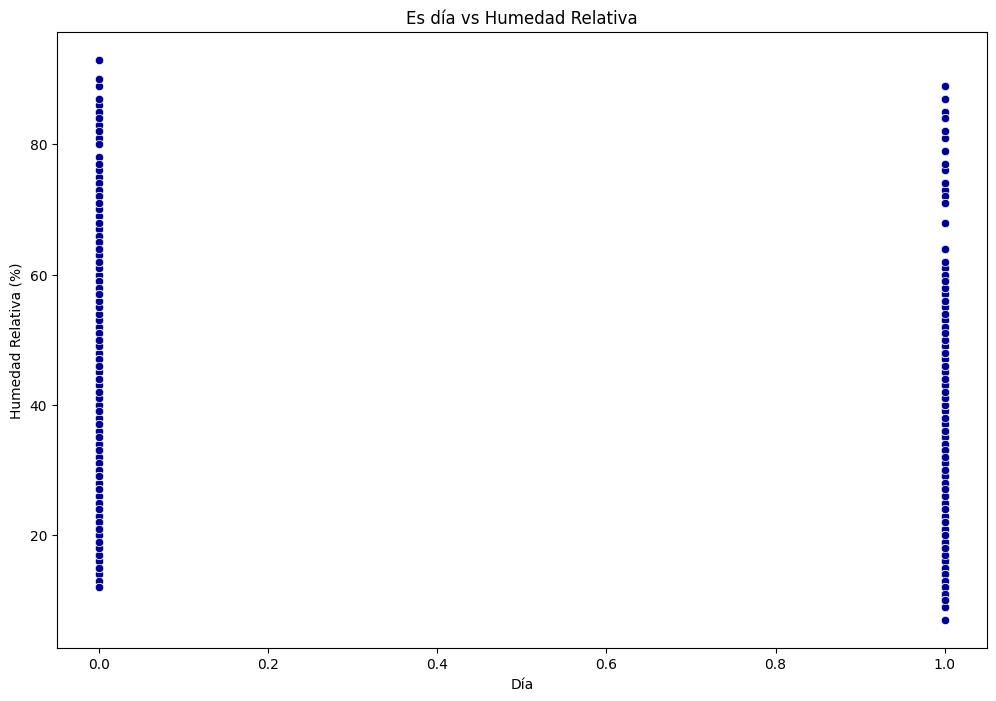

In [23]:
# Ejercicio: Scatterplot de es_dia y humedad relativa
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clima, x="es_dia", y="humedad_relativa", color = "darkblue")
plt.title("Es día vs Humedad Relativa")
plt.xlabel("Día")
plt.ylabel("Humedad Relativa (%)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

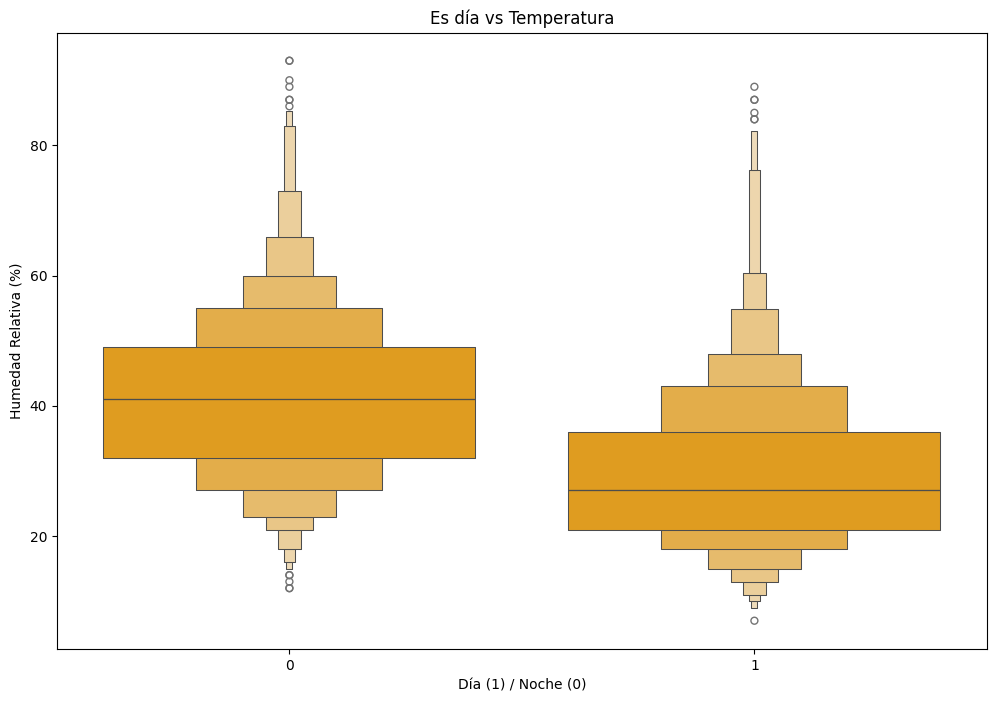

In [24]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df_clima, x="es_dia", y="humedad_relativa",color="orange")
plt.title("Es día vs Temperatura")
plt.xlabel("Día (1) / Noche (0)")
plt.ylabel("Humedad Relativa (%)")
plt.show

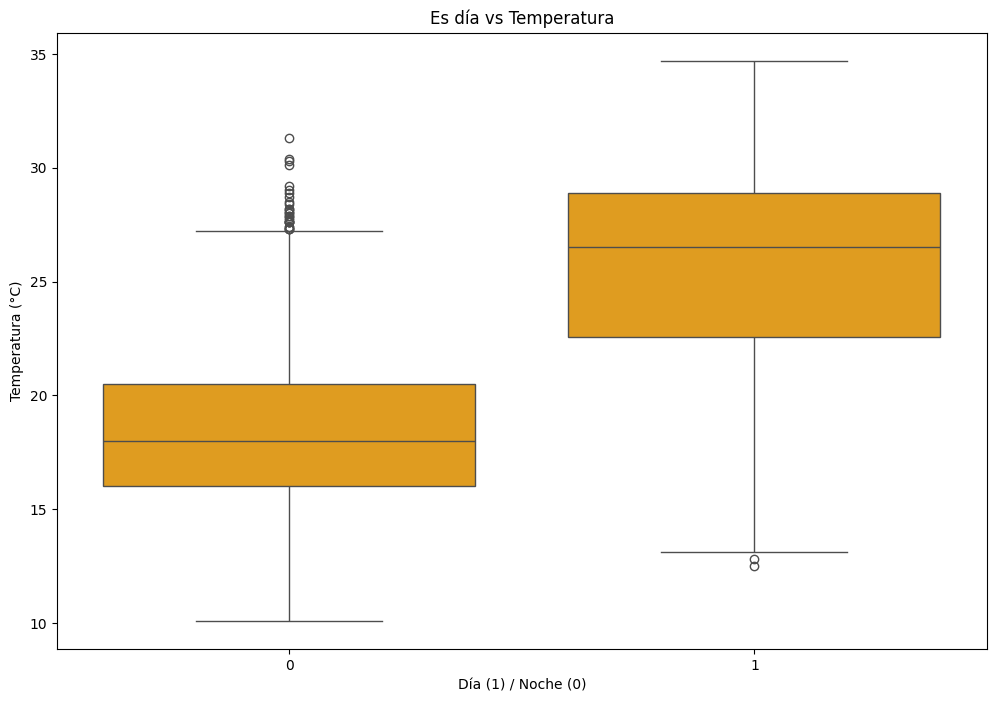

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clima, x="es_dia", y="temperatura", color = "orange")
plt.title("Es día vs Temperatura")
plt.xlabel("Día (1) / Noche (0)")
plt.ylabel("Temperatura (°C)")
plt.show()

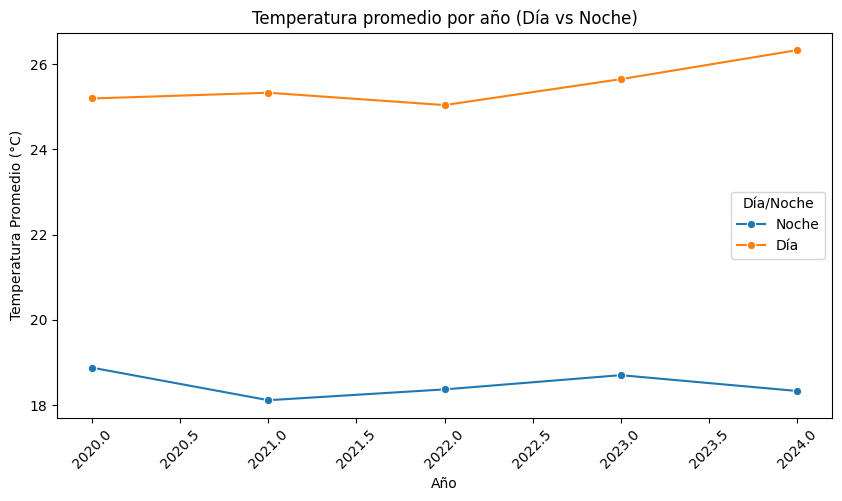

In [26]:
#Comparación de temperatura promedio por año de día y de noche
df_clima["es_dia"]=df_clima["es_dia"].astype(str) #Convertir a string para agrupar

#Agrupación por año y es_dia, se obtiene el promedio con una función de agregación
mean_temp=df_clima.groupby(["year","es_dia",]).agg({"temperatura":"mean"}).reset_index()

#Figura final
plt.figure(figsize=(10,5))
sns.lineplot(data=mean_temp, x="year", y="temperatura", hue="es_dia", marker="o")
plt.title("Temperatura promedio por año (Día vs Noche)")
plt.xlabel("Año")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Noche", "Día"], title="Día/Noche")
plt.show()

# Matriz de correlación de los datos

In [27]:
# Seleccionar solo las columnas numéricas
df_numericas = df_clima.select_dtypes(include=["number"]).drop(columns=["year", "month", "day", "es_dia"], errors="ignore")

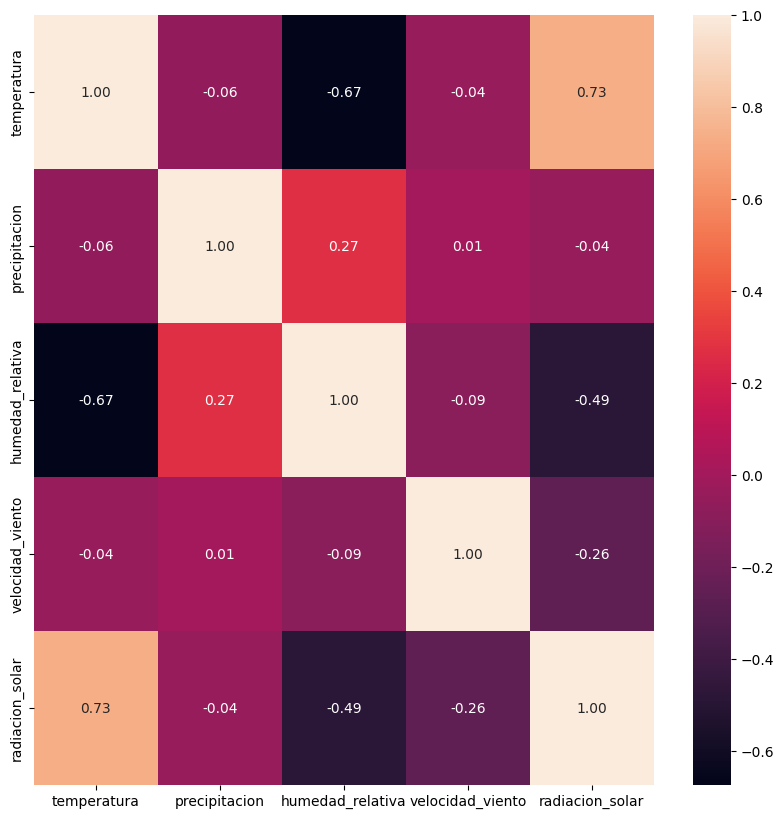

In [28]:
# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df_numericas.corr(), annot=True, fmt='.2f')
plt.show()

In [29]:
# Guardar el DataFrame que contiene datos de 2020 a 2024 en un archivo CSV
df_clima.to_csv("datos_clima_Morelos_2020_2024.csv",index=False)
print("Archivo CSV 'datos_clima_Morelos_2020_2024.csv' guardado exitosamente.")

Archivo CSV 'datos_clima_Morelos_2020_2024.csv' guardado exitosamente.


# Normalización de variable

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
#Lsita de columnas numéricas
numerical_columns=["temperatura","precipitacion","humedad_relativa","velocidad_viento","radiacion_solar"]

In [32]:
#Crear una copia del DataFrame para escalado
df_clima_scaled=df_clima.copy()

In [33]:
# Aplicar el escalado a las columnas numéricas
# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

In [34]:
#Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_clima_scaled.describe()

Primeras filas del DataFrame escalado:


,temperatura,precipitacion,humedad_relativa,velocidad_viento,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,0.473581,0.002914,0.334353,0.250655,0.263338,2022.000000,2.0,14.000000
std,0.216684,0.034681,0.156773,0.130768,0.346455,1.414432,0.0,7.790083
min,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,0.292683,0.000000,0.209302,0.156780,0.000000,2021.000000,2.0,7.000000
50%,0.443089,0.000000,0.313953,0.228814,0.003543,2022.000000,2.0,14.000000
75%,0.662602,0.000000,0.430233,0.322034,0.554656,2023.000000,2.0,21.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,2.0,27.000000


In [35]:
# Copia del dataset para la prueba de StandarScaler()
df_clima_ss = df_clima.copy()

# Implementación de StandarScaler sobre los datos numéricos
scaler_standar = StandardScaler()
df_clima_ss[numerical_columns] = scaler_standar.fit_transform(df_clima_ss[numerical_columns])

df_clima_ss.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,radiacion_solar,year,month,day
count,3.240000e+03,3.240000e+03,3.240000e+03,3.240000e+03,3.240000e+03,3240.000000,3240.0,3240.000000
mean,3.947460e-16,-1.315820e-17,-2.543918e-16,1.469332e-16,5.043976e-17,2022.000000,2.0,14.000000
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.414432,0.0,7.790083
min,-2.185918e+00,-8.402470e-02,-2.133047e+00,-1.917091e+00,-7.602098e-01,2020.000000,2.0,1.000000
25%,-8.349750e-01,-8.402470e-02,-7.977748e-01,-7.179901e-01,-7.602098e-01,2021.000000,2.0,7.000000
50%,-1.407406e-01,-8.402470e-02,-1.301387e-01,-1.670519e-01,-7.499833e-01,2022.000000,2.0,14.000000
75%,8.724665e-01,-8.402470e-02,6.116792e-01,5.459269e-01,8.409819e-01,2023.000000,2.0,21.000000
max,2.429803e+00,2.875496e+01,4.246587e+00,5.731228e+00,2.126610e+00,2024.000000,2.0,27.000000


## Selección de variables

In [36]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras = ["precipitacion", "humedad_relativa", "velocidad_viento", "es_dia", "radiacion_solar"]
objetivo = "temperatura"

# Variables predictoras (X) y variable objetivo (y)
X = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

### Mejores K variables

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [38]:
# Definir el número de características que queremos retener
k = 3  # Por ejemplo, seleccionaremos las 3 características más relevantes

# Crear el selector de características usando f_regression
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustar el selector a los datos
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas por SelectKBest:")
print(selected_features.tolist())

Características seleccionadas por SelectKBest:
['humedad_relativa', 'es_dia', 'radiacion_solar']


In [39]:
# Definir el número de características a seleccionar
k = 3  # Por ejemplo, seleccionaremos las 3 características más relevantes

# Inicializar el selector con mutual_info_regression como función de puntuación
selector = SelectKBest(score_func=mutual_info_regression, k=k)

# Ajustar el selector a los datos y transformar X para obtener únicamente las k mejores características
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas por SelectKBest con mutual_info_regression:")
print(selected_features.tolist())

Características seleccionadas por SelectKBest con mutual_info_regression:
['humedad_relativa', 'es_dia', 'radiacion_solar']


In [41]:
df_clima_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       3240 non-null   float64
 1   precipitacion     3240 non-null   float64
 2   humedad_relativa  3240 non-null   float64
 3   velocidad_viento  3240 non-null   float64
 4   es_dia            3240 non-null   object 
 5   radiacion_solar   3240 non-null   float64
 6   year              3240 non-null   int32  
 7   month             3240 non-null   int32  
 8   day               3240 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 190.0+ KB


In [42]:
# Copiado del dataframe escalado de clima
df_clima_select = df_clima_scaled.copy()

# Se eliminan las columnas que no aportaron información o resultaron relevantes para la predicción
df_clima_select = df_clima_select.drop(columns=["precipitacion", "velocidad_viento", "year", "month", "day"], errors="ignore")

In [43]:
df_clima_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       3240 non-null   float64
 1   humedad_relativa  3240 non-null   float64
 2   es_dia            3240 non-null   object 
 3   radiacion_solar   3240 non-null   float64
dtypes: float64(3), object(1)
memory usage: 101.4+ KB


## Pruebas con el primer modelo de aprendizaje



Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para hacer predicciones. Cada árbol se construye usando:
* Bootstrap: Muestras aleatorias de + los datos con reemplazo.
* Selección aleatoria de características en cada división del árbol

Para hacer una predicción:
* En clasificación: los árboles votan y se toma la clase mayoritaria.
* En regresión: se promedia la predicción de todos los árboles.

Ventajas principales:
* Reduce el sobreajuste
* Maneja bien datos no lineales
* Proporciona importancia de características
* Robusto ante valores atípicos y faltantes

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [45]:
# Lista de columnas numéricas
numerical_columns = ["precipitacion", "humedad_relativa", "velocidad_viento", "radiacion_solar"]

df_clima_scaled = df_clima.copy()

# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_clima_scaled.describe()

Primeras filas del DataFrame escalado:


,temperatura,precipitacion,humedad_relativa,velocidad_viento,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,21.750093,0.002914,0.334353,0.250655,0.263338,2022.000000,2.0,14.000000
std,5.330434,0.034681,0.156773,0.130768,0.346455,1.414432,0.0,7.790083
min,10.100000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,17.300000,0.000000,0.209302,0.156780,0.000000,2021.000000,2.0,7.000000
50%,21.000000,0.000000,0.313953,0.228814,0.003543,2022.000000,2.0,14.000000
75%,26.400000,0.000000,0.430233,0.322034,0.554656,2023.000000,2.0,21.000000
max,34.700000,1.000000,1.000000,1.000000,1.000000,2024.000000,2.0,27.000000


In [46]:
df_clima_scaled['temperatura_class'] = df_clima_scaled['temperatura'].round().astype(int)
df_clima_scaled.head()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day,temperatura_class
0,15.5,0.0,0.465116,0.402542,0,0.0,2020,2,1,16
1,15.0,0.0,0.476744,0.334746,0,0.0,2020,2,1,15
2,15.2,0.0,0.453488,0.305085,0,0.0,2020,2,1,15
3,15.4,0.0,0.406977,0.283898,0,0.0,2020,2,1,15
4,15.2,0.0,0.383721,0.343220,0,0.0,2020,2,1,15


In [47]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras = ["humedad_relativa", "es_dia", "radiacion_solar"]
objetivo = "temperatura_class"

# Variables predictoras (X) y variable objetivo (y)
X = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

In [48]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Realizar predicciones y evaluar el modelo RandomForest
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Cálculo de métricas para RandomForest
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=True)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.1574074074074074
Precision (macro): 0.1987123737754205
Recall (macro): 0.15377647403419584
F1-score (macro): 0.112782998542559


# Regresión Logística

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Crear el modelo de regresión logística
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg_model.predict(X_test)

In [54]:
# Crear el modelo de regresión logística
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg_model.predict(X_test)

In [55]:
# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("=== Regresión Logística ===")
print("Accuracy:  {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall:    {:.4f}".format(recall))
print("F1 Score:  {:.4f}".format(f1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Regresión Logística ===
Accuracy:  0.1543
Precision: 0.0531
Recall:    0.1543
F1 Score:  0.0771

Classification Report:
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        30
          16       0.17      0.57      0.27        40
          17       0.00      0.00      0.00        50
          18       0.16      0.54      0.24        57
          19       0.07      0.10      0.08        42
          20       0.00      0.00      0.00        42
          21       0.08      0.10      0.09        20
          22       0.00      0.00      0.00        35
          23       0.00      0.00      0.00        32
          24       0.00      0.00      0.00        23
          25       0.00      0.00      0.00        23
          2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Utilizando radiación solar como variable objetivo

In [56]:
# Lista de columnas numéricas
numerical_columns = ["precipitacion", "humedad_relativa", "velocidad_viento", "temperatura"]

df_clima_scaled = df_clima.copy()

# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_clima_scaled.describe()

Primeras filas del DataFrame escalado:


,temperatura,precipitacion,humedad_relativa,velocidad_viento,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,0.473581,0.002914,0.334353,0.250655,260.178086,2022.000000,2.0,14.000000
std,0.216684,0.034681,0.156773,0.130768,342.297916,1.414432,0.0,7.790083
min,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,0.292683,0.000000,0.209302,0.156780,0.000000,2021.000000,2.0,7.000000
50%,0.443089,0.000000,0.313953,0.228814,3.500000,2022.000000,2.0,14.000000
75%,0.662602,0.000000,0.430233,0.322034,548.000000,2023.000000,2.0,21.000000
max,1.000000,1.000000,1.000000,1.000000,988.000000,2024.000000,2.0,27.000000


In [57]:
# threshold = df_clima_scaled['radiacion_solar'].median()
df_clima_scaled['alta_radiacion'] = (df_clima_scaled['radiacion_solar'] > 548).astype(int)

In [58]:
# Definir las variables predictoras y la variable objetivo (variable a predecir)
predictoras = ["humedad_relativa", "es_dia", "temperatura"]
objetivo = "alta_radiacion"

# Variables predictoras (X) y variable objetivo (y)
X = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

In [59]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Realizar predicciones y evaluar el modelo RandomForest
y_pred_rf = rf_model.predict(X_test)

In [62]:
# Cálculo de métricas para RandomForest
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=True)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.8564814814814815
Precision (macro): 0.8095098783721538
Recall (macro): 0.8132181011892763
F1-score (macro): 0.8113300878167901


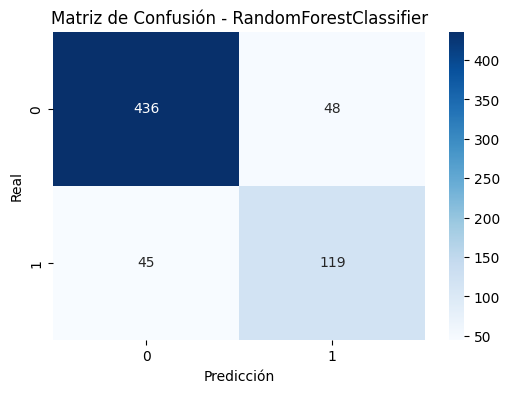

In [63]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Ejercicio para desarrollo de modelo de aprendizaje automático

**Requisitos:**
- Obtener de la API de Open-Meteor la información de parámetros diarios: `"daily": ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "rain_sum", "precipitation_hours", "wind_speed_10m_max", "shortwave_radiation_sum"]`
- Escoger un rango de fechas (de preferencia, dos años o más)
- Revisar que no existan campos duplicados, nulos.
- Escoger variable objetivo (lluvia, radiación, viento o temperatura)
- Hacer un análisis exploratorio (histogramas, gráficos de caja, matriz de correlación)
- Escalado de datos (MinMax, Standard)
- Implementar un algoritmo de aprendizaje (RandomForest u otro)
- Imprimir métricas resultantes de desempeño